<a href="https://colab.research.google.com/github/a-smaruj/Machine-learning-finance-classes/blob/main/MLF_class_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importy

In [ ]:
import datetime as dt
import yfinance as yf
import numpy as np
import itertools
import pandas as pd
from prophet import Prophet
from prophet.plot import plot_plotly,plot_components_plotly
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric
from sklearn.metrics import mean_absolute_error
from pandas.tseries.holiday import USFederalHolidayCalendar

#Pobierzcie dane notowań EURUSD z yfinance (ostatnie 3 lata)

In [ ]:
data = yf.download("EURUSD=X", period="3Y")
df = pd.DataFrame(data)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-04-22,1.203818,1.207001,1.200394,1.203775,1.203775,0
2021-04-23,1.201793,1.207799,1.201389,1.201475,1.201475,0
2021-04-26,1.208956,1.211827,1.206374,1.208985,1.208985,0
2021-04-27,1.207921,1.209190,1.205793,1.208167,1.208167,0
2021-04-28,1.208854,1.210214,1.205764,1.209031,1.209031,0


In [ ]:
df = df.drop(columns=['Open', 'High', 'Low', 'Adj Close', 'Volume'])
df = df.reset_index().rename(columns={'Date': 'ds', 'Close': 'y'})
df['ds'] = pd.to_datetime(df['ds'])
df.head()

,ds,y
0,2021-04-22,1.203775
1,2021-04-23,1.201475
2,2021-04-26,1.208985
3,2021-04-27,1.208167
4,2021-04-28,1.209031


# Wykorzystajcie walidacje krzyżową do zbudowania modelu (pierwsze 2 lata nauki, potem okno miesięczne z prognozami na najbliższy tydzień)


In [ ]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=365)
future.tail()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvkyfh_sk/r3edn37u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvkyfh_sk/6foupvzq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=56002', 'data', 'file=/tmp/tmpvkyfh_sk/r3edn37u.json', 'init=/tmp/tmpvkyfh_sk/6foupvzq.json', 'output', 'file=/tmp/tmpvkyfh_sk/prophet_modelp0j34zcw/prophet_model-20240422103003.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:30:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:30:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


,ds
1143,2025-04-18
1144,2025-04-19
1145,2025-04-20
1146,2025-04-21
1147,2025-04-22


In [ ]:
df_cv = cross_validation(m, initial='730 days', period='30 days', horizon='5 days')

INFO:prophet:Making 13 forecasts with cutoffs between 2023-04-23 00:00:00 and 2024-04-17 00:00:00


  0%|          | 0/13 [00:00<?, ?it/s]

DEBUG:cmdstanpy:input tempfile: /tmp/tmpvkyfh_sk/1w3jsxtb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvkyfh_sk/2n8g72q1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82296', 'data', 'file=/tmp/tmpvkyfh_sk/1w3jsxtb.json', 'init=/tmp/tmpvkyfh_sk/2n8g72q1.json', 'output', 'file=/tmp/tmpvkyfh_sk/prophet_modeldae0c0pa/prophet_model-20240422103005.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:30:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:30:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvkyfh_sk/r5upf4_8.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvkyfh_sk/0detn2qb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

# Przedstaw wyniki na wykresie

  horizon       mse      rmse       mae      mape     mdape     smape  \
0  1 days  0.000197  0.014018  0.011699  0.010776  0.009594  0.010775   
1  2 days  0.000197  0.014034  0.011772  0.010848  0.010039  0.010830   
2  3 days  0.000201  0.014161  0.011051  0.010183  0.010429  0.010143   
3  4 days  0.000245  0.015652  0.014238  0.013063  0.012816  0.013093   
4  5 days  0.000219  0.014786  0.012865  0.011806  0.011400  0.011859   

   coverage  
0  0.500000  
1  0.600000  
2  0.444444  
3  0.333333  
4  0.444444  


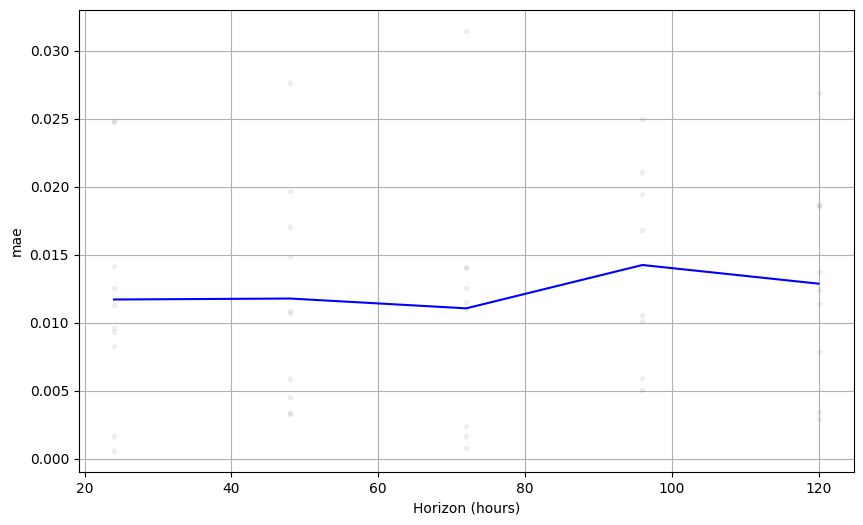

In [ ]:
df_p = performance_metrics(df_cv)
print(df_p.head())
fig = plot_cross_validation_metric(df_cv, metric = 'mae')

# Oceń model przy pomocy MAE

In [ ]:
mae = df_p['mae'].mean()
print("Mean Absolute Error (MAE):", mae)

Mean Absolute Error (MAE): 0.012325043580785502


# Sprawdźcie czy dodanie świąt w USA poprawi model

In [ ]:
cal = USFederalHolidayCalendar()
holidays = pd.DataFrame({
    'ds': cal.holidays(start='2010-01-01', end='2024-12-31'),
    'holiday': 'USFederalHoliday'
})

In [ ]:
m_holidays = Prophet(holidays=holidays)
m_holidays.add_country_holidays(country_name='US')
m_holidays.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvkyfh_sk/4j0vygab.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvkyfh_sk/ct_tch2k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13695', 'data', 'file=/tmp/tmpvkyfh_sk/4j0vygab.json', 'init=/tmp/tmpvkyfh_sk/ct_tch2k.json', 'output', 'file=/tmp/tmpvkyfh_sk/prophet_modelq708bnsc/prophet_model-20240422103127.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:31:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:31:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast_no_holidays = m.predict(df)
forecast_with_holidays = m_holidays.predict(df)

In [ ]:
mae_no_holidays = mean_absolute_error(df['y'], forecast_no_holidays['yhat'])
mae_with_holidays = mean_absolute_error(df['y'], forecast_with_holidays['yhat'])

print("MAE without holidays:", mae_no_holidays)
print("MAE with holidays:", mae_with_holidays)

MAE without holidays: 0.007659989116491578
MAE with holidays: 0.007609423462948128


# Hiperparametryzacja

In [ ]:
param_grid = {
    'holidays_prior_scale': [0.001, 0.01, 0.1, 0.5],
    'seasonality_prior_scale': [0.01, 0.1, 1.0, 10.0],
}

all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]
cutoffs = pd.to_datetime(['2021-04-23', '2022-04-23', '2023-04-23'])
rmses = []

for params in all_params:
    m = Prophet(**params).fit(df)
    df_cv = cross_validation(m, cutoffs=cutoffs, horizon='5 days', parallel="processes")
    df_p = performance_metrics(df_cv, rolling_window=1)
    rmses.append(df_p['rmse'].values[0])

tuning_results = pd.DataFrame(all_params)
tuning_results['rmse'] = rmses
print(tuning_results)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvkyfh_sk/03s_eyk0.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvkyfh_sk/dlowf7v3.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=99676', 'data', 'file=/tmp/tmpvkyfh_sk/03s_eyk0.json', 'init=/tmp/tmpvkyfh_sk/dlowf7v3.json', 'output', 'file=/tmp/tmpvkyfh_sk/prophet_modeltqu55uhw/prophet_model-20240422104619.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:46:19 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:46:19 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Applying in parallel with <concurrent.futures.process.ProcessPoolExecutor object at 0x7e67ef531750>
INFO:prophet:n_changepoints g

    holidays_prior_scale  seasonality_prior_scale      rmse
0                  0.001                     0.01  0.015490
1                  0.001                     0.10  0.086228
2                  0.001                     1.00  2.840425
3                  0.001                    10.00  3.639286
4                  0.010                     0.01  0.015490
5                  0.010                     0.10  0.086228
6                  0.010                     1.00  2.840425
7                  0.010                    10.00  3.639286
8                  0.100                     0.01  0.015490
9                  0.100                     0.10  0.086228
10                 0.100                     1.00  2.840425
11                 0.100                    10.00  3.639286
12                 0.500                     0.01  0.015490
13                 0.500                     0.10  0.086228
14                 0.500                     1.00  2.840425
15                 0.500                

In [ ]:
best_params = all_params[np.argmin(rmses)]
print(best_params)

{'holidays_prior_scale': 0.001, 'seasonality_prior_scale': 0.01}


In [ ]:
m_new = Prophet(holidays=holidays, holidays_prior_scale = 0.001, seasonality_prior_scale = 0.01)
m_new.add_country_holidays(country_name='US')
m_new.fit(df)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvkyfh_sk/npr4t7wp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpvkyfh_sk/jq3cfvwh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=1535', 'data', 'file=/tmp/tmpvkyfh_sk/npr4t7wp.json', 'init=/tmp/tmpvkyfh_sk/jq3cfvwh.json', 'output', 'file=/tmp/tmpvkyfh_sk/prophet_modelff410koi/prophet_model-20240422105508.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:55:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:55:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
forecast_new = m_new.predict(df)

In [ ]:
mae_new = mean_absolute_error(df['y'], forecast_new['yhat'])
print("MAE new:", mae_new)

MAE new: 0.007748448367304815
